In [1]:
from marubatsu import Marubatsu
import matplotlib.pyplot as plt
import japanize_matplotlib
import ipywidgets as widgets
import math

def play_common(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # 〇×ゲームを再起動する
    self.restart()

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ゲーム盤の表示
        if verbose:
            if gui:
                # AI どうしの対戦の場合は画面を描画しない
                if ai[0] is None or ai[1] is None:
                    self.draw_board(ax)
                # 手番を人間が担当する場合は、play メソッドを終了する
                if ai[index] is None:
                    return
            else:
                print(self)
                
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status
    
Marubatsu.play_common = play_common

In [2]:
def play_common(self, ai, params=[{}, {}], verbose=True, gui=False):
    # 〇×ゲームを再起動する
    self.restart()

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ゲーム盤の表示
        if verbose:
            if gui:
                # AI どうしの対戦の場合は画面を描画しない
                if ai[0] is None or ai[1] is None:
                    self.draw_board(ax)
                # 手番を人間が担当する場合は、play メソッドを終了する
                if ai[index] is None:
                    return
            else:
                print(self)
                
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status
    
Marubatsu.play_common = play_common

In [3]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # リセットボタンを配置する
    button = widgets.Button(description="リセット")
    display(button)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.play_common(ai=ai, params=params, verbose=verbose, gui=gui)           
         
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 現在の手番を表す ai のインデックスを計算する
                index = 0 if self.turn == Marubatsu.CIRCLE else 1
                # ゲームの決着がついていない場合に、ai が着手を行うかどうかを判定する
                if self.status == Marubatsu.PLAYING and ai[index] is not None:                
                    x, y = ai[index](self, **params[index])
                    self.move(x, y) 
                    self.draw_board(ax)
                   
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    return self.play_common(ai=ai, params=params, verbose=verbose, gui=gui)
    
Marubatsu.play = play

Button(description='リセット', style=ButtonStyle())

NameError: name 'ax' is not defined

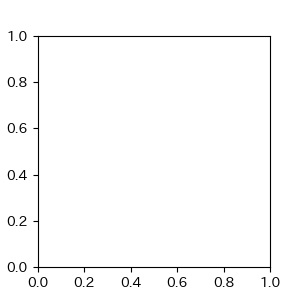

In [4]:
%matplotlib widget
from ai import ai2
mb = Marubatsu()

mb.play(ai=[ai2, ai2], gui=True);

In [5]:
def play_common(self, ai, ax, params=[{}, {}], verbose=True, gui=False):
    # 〇×ゲームを再起動する
    self.restart()

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ゲーム盤の表示
        if verbose:
            if gui:
                # AI どうしの対戦の場合は画面を描画しない
                if ai[0] is None or ai[1] is None:
                    self.draw_board(ax)
                # 手番を人間が担当する場合は、play メソッドを終了する
                if ai[index] is None:
                    return
            else:
                print(self)
                
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status
    
Marubatsu.play_common = play_common

In [6]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # リセットボタンを配置する
    button = widgets.Button(description="リセット")
    display(button)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.play_common(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
         
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 現在の手番を表す ai のインデックスを計算する
                index = 0 if self.turn == Marubatsu.CIRCLE else 1
                # ゲームの決着がついていない場合に、ai が着手を行うかどうかを判定する
                if self.status == Marubatsu.PLAYING and ai[index] is not None:                
                    x, y = ai[index](self, **params[index])
                    self.move(x, y) 
                    self.draw_board(ax)
                   
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    return self.play_common(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
    
Marubatsu.play = play

Button(description='リセット', style=ButtonStyle())

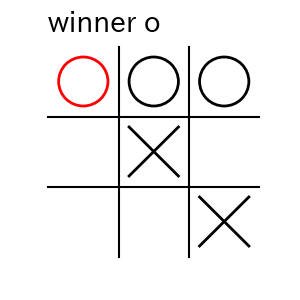

In [7]:
mb.play(ai=[ai2, ai2], gui=True);

In [8]:
def play_loop(self, ai, ax, params=[{}, {}], verbose=True, gui=False):
    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ゲーム盤の表示
        if verbose:
            if gui:
                # AI どうしの対戦の場合は画面を描画しない
                if ai[0] is None or ai[1] is None:
                    self.draw_board(ax)
                # 手番を人間が担当する場合は、play メソッドを終了する
                if ai[index] is None:
                    return
            else:
                print(self)
                
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status   
    
Marubatsu.play_loop = play_loop

In [9]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # リセットボタンを配置する
    button = widgets.Button(description="リセット")
    display(button)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.play_common(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
         
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                   
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    return self.play_common(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
    
Marubatsu.play = play

Button(description='リセット', style=ButtonStyle())

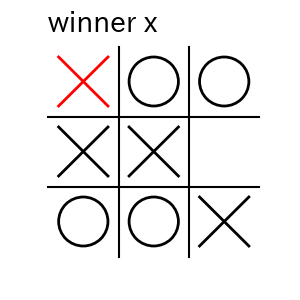

In [10]:
mb.play(ai=[ai2, ai2], gui=True);

In [11]:
def play_common(self, ai, ax, params=[{}, {}], verbose=True, gui=False):
    # 〇×ゲームを再起動する
    self.restart()

    # 決着がつくまでの繰り返し処理を行うメソッドを呼び出す
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play_common = play_common

Button(description='リセット', style=ButtonStyle())

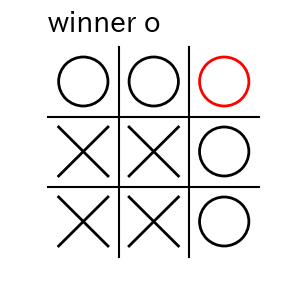

In [12]:
mb.play(ai=[ai2, ai2], gui=True);

In [13]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # リセットボタンを配置する
    button = widgets.Button(description="リセット")
    display(button)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        # ゲームをリセットする
        self.restart()
        # 決着がつくまで繰り返す処理を呼び出す
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
         
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                   
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    # ゲームをリセットする
    self.restart()
    # 決着がつくまで繰り返す処理を呼び出す
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
    
Marubatsu.play = play

Button(description='リセット', style=ButtonStyle())

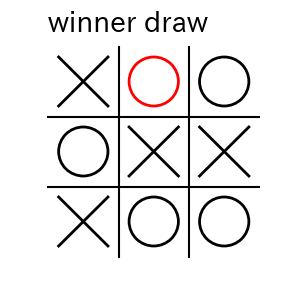

In [14]:
mb.play(ai=[ai2, ai2], gui=True);

Button(description='リセット', style=ButtonStyle())

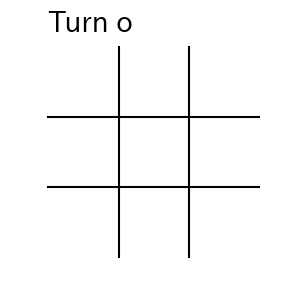

In [15]:
mb.play(ai=[None, ai2], gui=True);

Button(description='リセット', style=ButtonStyle())

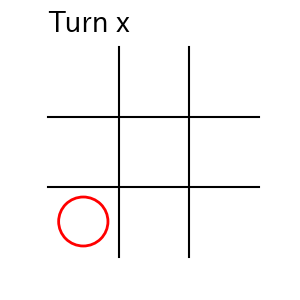

In [16]:
mb.play(ai=[ai2, None], gui=True);

Button(description='リセット', style=ButtonStyle())

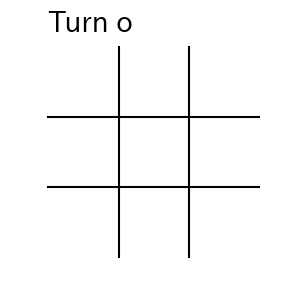

In [17]:
mb.play(ai=[None, None], gui=True);